In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
conversion_df = pd.read_csv("~/Insight_Data_Science/Pre_Session_Data_Exercise/conversion_data.csv")

In [2]:
conversion_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
conversion_df.shape

(316200, 6)

In [4]:
conversion_df = conversion_df.dropna()
conversion_df = conversion_df[conversion_df['age']<=100]
conversion_df.shape

(316198, 6)

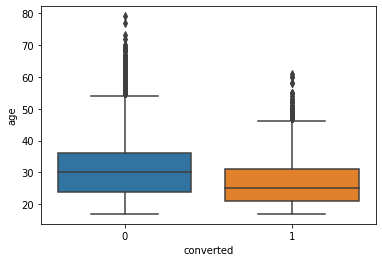

In [5]:
sns.boxplot(x='converted', y='age', data=conversion_df)

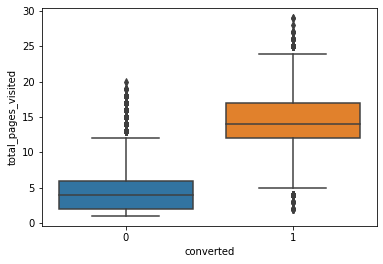

In [6]:
sns.boxplot(x='converted', y='total_pages_visited', data=conversion_df)

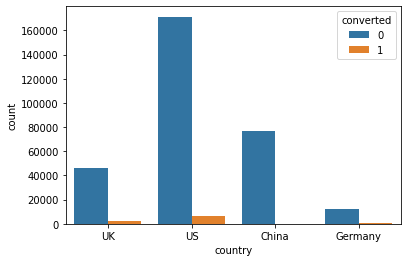

In [7]:
sns.countplot(x='country', hue='converted', data=conversion_df)

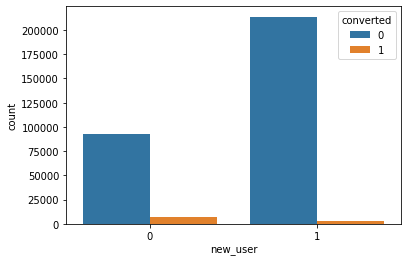

In [8]:
sns.countplot(x='new_user', hue='converted', data=conversion_df)

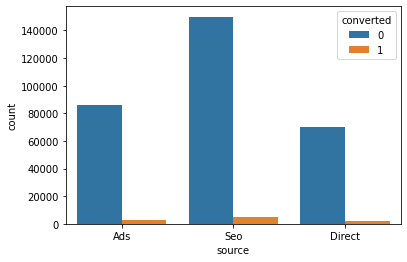

In [9]:
sns.countplot(x='source', hue='converted', data=conversion_df)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix

In [11]:
X = conversion_df.drop(['converted'] ,axis=1)
y = conversion_df['converted']

In [12]:
label_encoder = LabelEncoder()
label_encoder.fit(X['country'])
X['country'] = label_encoder.transform(X['country'])

In [13]:
label_encoder = LabelEncoder()
label_encoder.fit(X['source'])
X['source'] = label_encoder.transform(X['source'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
grid_values = {'learning_rate': [0.01, 0.1]}
gradient_boost = GradientBoostingClassifier(random_state = 0)
grid_gradient_boost= GridSearchCV(gradient_boost, param_grid = grid_values, scoring = 'recall')
grid_gradient_boost.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1]}, scoring='recall')

In [16]:
print('Grid best parameter (maximize recall): ', grid_gradient_boost.best_params_)
print('Grid best score (recall): ', grid_gradient_boost.best_score_)
# Use recall as the metric to choose model because the data is imbalanced
# I don't want the converted users to be predicted as unconverted 

Grid best parameter (maximize recall):  {'learning_rate': 0.1}
Grid best score (recall):  0.688418264362397


In [17]:
y_pred = grid_gradient_boost.predict(X_test)

In [18]:
len(y_pred)

63240

In [19]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8452739313666466
0.6916256157635468


In [21]:
print(confusion_matrix(y_test, y_pred))
print('tn, fp, fn, tp = ', confusion_matrix(y_test, y_pred).ravel())

[[60953   257]
 [  626  1404]]
tn, fp, fn, tp =  [60953   257   626  1404]


In [85]:
#To improve conversion rate: Focusing user age under 30 and located in US and UK.